In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LinearRegression
import numpy as np


In [3]:
import yfinance as yf
xle_data = yf.download("XLE", start="2000-01-01", end="2023-12-31")
print(xle_data.head())


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open  Volume
Ticker            XLE        XLE        XLE        XLE     XLE
Date                                                          
2000-01-03  13.846354  14.237310  13.748616  14.237310  380300
2000-01-04  13.585725  13.716044  13.487986  13.716044  722200
2000-01-05  13.944098  13.944098  13.553142  13.618301  337800
2000-01-06  14.481661  14.514241  13.944096  13.944096  133100
2000-01-07  14.636418  14.807462  14.432795  14.432795  468000


In [10]:
#print(xle_data.head())       # View first few rows
print(xle_data.info())       # Summary of data types and missing values
#print(xle_data.describe())   # Summary statistics

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6037 entries, 2000-01-03 to 2023-12-29
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, XLE)   6037 non-null   float64
 1   (High, XLE)    6037 non-null   float64
 2   (Low, XLE)     6037 non-null   float64
 3   (Open, XLE)    6037 non-null   float64
 4   (Volume, XLE)  6037 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 283.0 KB
None


In [5]:
print(xle_data.isnull().sum())  # Count missing values per column


Price   Ticker
Close   XLE       0
High    XLE       0
Low     XLE       0
Open    XLE       0
Volume  XLE       0
dtype: int64


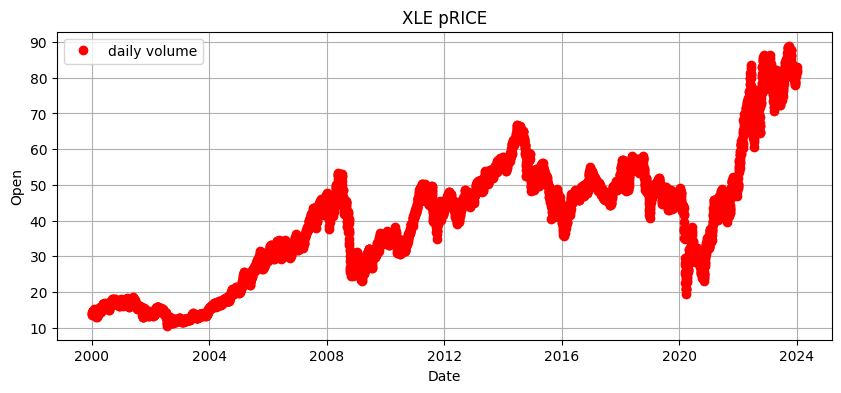

In [25]:
X = xle_data.index
Y = xle_data['Open']
plt.figure(figsize=(10, 4))
plt.plot(X, Y, 'o', color = 'red', label = 'daily volume')
plt.title('XLE pRICE')
plt.xlabel('Date')
plt.ylabel('Open')
plt.legend()
plt.grid()  # Optional: Add gridlines
plt.show()

In [18]:
xle_data.corr()

,Price,Close,High,Low,Open,Volume
,Ticker,XLE,XLE,XLE,XLE,XLE
Price,Ticker,,,,,
Close,XLE,1.000000,0.999705,0.999750,0.999459,0.369431
High,XLE,0.999705,1.000000,0.999595,0.999754,0.378728
Low,XLE,0.999750,0.999595,1.000000,0.999694,0.360787
Open,XLE,0.999459,0.999754,0.999694,1.000000,0.370931
Volume,XLE,0.369431,0.378728,0.360787,0.370931,1.000000


In [32]:
epoch = np.datetime64('1970-01-01')
X = (xle_data.index - epoch).days.values.reshape(-1, 1)
Y = xle_data['Close'].values

# Step 3: Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Step 4: Train Linear Regression Model
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

# Step 5: Evaluate the Model
print("Coefficients:", regression_model.coef_)
print("Intercept:", regression_model.intercept_)

# Step 6: Make Predictions
Y_pred = regression_model.predict(X_test)

Coefficients: [[0.00573982]]
Intercept: [-48.24750929]


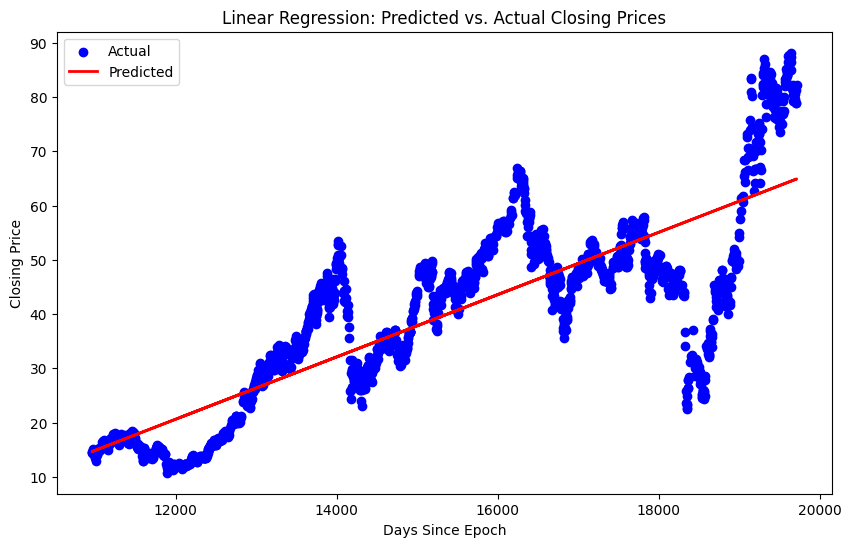

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.plot(X_test, Y_pred, color='red', label='Predicted', linewidth=2)
plt.title('Linear Regression: Predicted vs. Actual Closing Prices')
plt.xlabel('Days Since Epoch')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [40]:
# Example: Predict closing price for "2024-01-01"
target_date = np.datetime64('2024-02-01')  # Target date in numpy datetime64 format
epoch = np.datetime64('1970-01-01')  # Unix epoch reference

# Convert the target date to days since the epoch
days_since_epoch = (target_date - epoch).astype(int).reshape(-1, 1)

# Make the prediction
predicted_price = regression_model.predict(days_since_epoch)

# Ensure the predicted price is a scalar
predicted_price_value = float(predicted_price[0])  

# Format and print the result
print(f"Predicted Closing Price for {target_date}: ${predicted_price_value:.2f}")



Predicted Closing Price for 2024-02-01: $65.14


/tmp/ipykernel_4562/3271490230.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_price_value = float(predicted_price[0])  # Convert to scalar type (float)
